# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
from os import getenv as gtenv

# Import the Requests HTTP library
import requests
from requests import get as rget

# Import the JSON module
import json
from json import dumps as jds

# Import the Pandas library
import pandas as pd
from pandas import Timestamp as tstamp
from pandas import concat as ccat
from pandas import DataFrame as wdf

# Import the NumPy library
import numpy as np

from dotenv import load_dotenv as ldotenv

# Import the python alpaca_trade_api library
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# from datetime module
# Import date and timedelta class
from datetime import date
from datetime import timedelta

# Import the matplotlib depencies
import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import heatmap as htmap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
ldotenv('api.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=USD'

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = rget(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(jds(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19161343,
            "id": 1,
            "last_updated": 1664215166,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 366226916804,
                    "percent_change_1h": 0.188201886218145,
                    "percent_change_24h": 0.744851162165675,
                    "percent_change_7d": -1.50900418868522,
                    "percentage_change_1h": 0.188201886218145,
                    "percentage_change_24h": 0.744851162165675,
                    "percentage_change_7d": -1.50900418868522,
                    "price": 19143.85,
                    "volume_24h": 40330808263
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19161343,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = rget(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(jds(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120690150,
            "id": 1027,
            "last_updated": 1664215112,
            "max_supply": 120690150,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 159483260447,
                    "percent_change_1h": 0.146261378229355,
                    "percent_change_24h": 2.46216086449645,
                    "percent_change_7d": -0.685776264367985,
                    "percentage_change_1h": 0.146261378229355,
                    "percentage_change_24h": 2.46216086449645,
                    "percentage_change_7d": -0.685776264367985,
                    "price": 1326.69,
                    "volume_24h": 15311838750
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120690150,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The price for Bitcoin is ${btc_price}')

The price for Bitcoin is $19143.85


In [9]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The price for Bitcoin is ${eth_price}')

The price for Bitcoin is $1326.69


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'The current value for Bitcoin (BTC) holdings is ${round(btc_value, 2)}')

The current value for Bitcoin (BTC) holdings is $22972.62


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'The current value for Etherium (ETH) holdings is ${round(eth_value, 2)}')

The current value for Etherium (ETH) holdings is $7031.46


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The current cryptocurrency wallet balance is ${round(total_crypto_wallet, 2)}')

The current cryptocurrency wallet balance is $30004.08


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = gtenv('ALPACA_API_KEY') 
alpaca_secret_key = gtenv('ALPACA_SECRET_KEY')

# Verify that Alpaca key and secret were correctly loaded
print('\n')
display(type(alpaca_api_key))
print(f'Alpaca Key type: {type(alpaca_api_key)} \n')
display(type(alpaca_secret_key))
print(f'Alpaca Secret Key type: {type(alpaca_secret_key)} \n')

str

Alpaca Key type: <class 'str'> 



str

Alpaca Secret Key type: <class 'str'> 



In [15]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
# iShares Core US Aggregate Bond ETF (ticker: AGG)
# SPDR S&P 500 ETF Trust (ticker: SPY) 
tickers = ['AGG', 'SPY']

# Set timeframe to 1Day
timeframe = '1D'

# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day

# extrapolate yesterday from today
today = date.today()
yesterday = today - timedelta(days = 3)   # change as needed for wkends

# Format current date as ISO format
start_date = tstamp(yesterday, tz = 'America/New_York').isoformat()
end_date = tstamp(yesterday, tz = 'America/New_York').isoformat()

print(f'Today is: {today}')
print(f'Yesterday was: {yesterday}')

Today is: 2022-09-26
Yesterday was: 2022-09-23


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

display(df_portfolio)

# Access the closing prices for Portfolio DataFrame
# display close prices
close_prices_df = df_portfolio.iloc[:,[3]]
display(close_prices_df)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-23 04:00:00+00:00,97.40,97.45,96.89,97.20,11053650,41351,97.135798,AGG
2022-09-23 04:00:00+00:00,370.58,370.62,363.29,367.95,121574096,838774,367.579806,SPY


,close
timestamp,
2022-09-23 04:00:00+00:00,97.20
2022-09-23 04:00:00+00:00,367.95


In [18]:
# Reorganize the DataFrame
# Separate ticker data
# Separate Ticker Data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the Ticker DataFrames
df_portfolio = ccat([SPY, AGG],axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
# Display sample data
display(df_portfolio.head())  # There is only a single row as the instructions dictate use a single day on timeframe daily.

AGG                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-09-23 04:00:00+00:00  370.58  370.62  363.29  367.95  121574096   

                                                    SPY                      \
                          trade_count        vwap  open   high    low close   
timestamp                                                                     
2022-09-23 04:00:00+00:00      838774  367.579806  97.4  97.45  96.89  97.2   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-09-23 04:00:00+00:00  11053650       41351  97.135798

In [19]:
# Access the closing prices for Portfolio DataFrame
# display close prices
df_portfolio_close = df_portfolio.iloc[:,[3,10]]
display(df_portfolio_close)

,AGG,SPY
,close,close
timestamp,,
2022-09-23 04:00:00+00:00,367.95,97.2


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [20]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio['AGG']['close'])

# Print the AGG closing price
# YOUR CODE HERE
display(agg_close_price)

367.95

In [21]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio['SPY']['close'])

# Print the SPY closing price
display(spy_close_price)

97.2

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [22]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f'The current value of the iShares Core US Aggregate Bond ETF (ticker: AGG) portfolio is ${agg_value}')

The current value of the iShares Core US Aggregate Bond ETF (ticker: AGG) portfolio is $73590.0


In [23]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f'The current value of the SPDR S&P 500 ETF Trust (ticker: SPY) portfolio is ${spy_value}')

The current value of the SPDR S&P 500 ETF Trust (ticker: SPY) portfolio is $10692.0


In [24]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds =  agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The total value of the stock and bond portion of the portfolio is ${round(total_stocks_bonds, 2)}')

The total value of the stock and bond portion of the portfolio is $84282.0


In [25]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'The current cryptocurrency wallet balance is ${round(total_crypto_wallet, 2)} \n')
# Print total entire savings portfolio balance
print(f'The total value of savings portfolio is ${round(total_portfolio, 2)} \n')

The current cryptocurrency wallet balance is $30004.08 

The total value of savings portfolio is $114286.08 



### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [26]:
# Consolidate financial assets data into a Python list
savings_data=[total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)

[30004.076999999997, 84282.0]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [27]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df=wdf(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stock/bond']
)

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,30004.077
stock/bond,84282.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - 2022-09-23'}, ylabel='amount'>

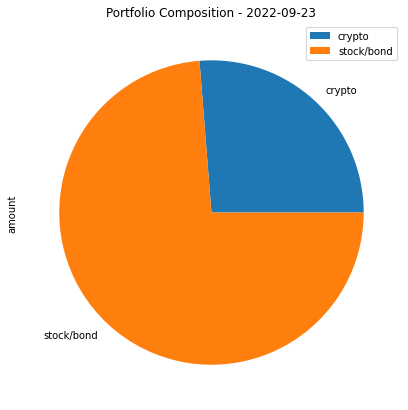

In [73]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y='amount', title= f'Portfolio Composition - {yesterday}', figsize=(10,7))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [29]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [30]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print(f'\n Congratulations, with ${total_portfolio:.2f} in your acount, your fund balance would seem to be sufficient!')
elif total_portfolio == emergency_fund_value:
    print(f'\n Congratulations, by saving ${total_portfolio:.2f} in your account, your fund balance has reached an important financial goal!')
else:
    print(f'\n Your savings are ${emergency_fund_value-total_portfolio} short of the goal.')


 Congratulations, with $114286.08 in your acount, your fund balance would seem to be sufficient!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [31]:
# SCENARIO ONE - 3 years data history
# Set start and end dates of 3 years back from your current date
end_3yrs = pd.to_datetime('today')
start_3yrs = end_3yrs - np.timedelta64(3, 'Y')
display(end_3yrs)
display(start_3yrs)

# Set the values for start_date and end_date using the pd.Timestamp function
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_3yrs = tstamp(start_3yrs, tz = 'America/New_York').isoformat()
end_3yrs = tstamp(end_3yrs, tz = 'America/New_York').isoformat()
display(end_3yrs)
display(start_3yrs)
print('\n')

Timestamp('2022-09-26 13:02:33.627120')

Timestamp('2019-09-26 19:34:57.627120')

'2022-09-26T13:02:33.627120-04:00'

'2019-09-26T19:34:57.627120-04:00'

In [32]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

# set limit
limit_rows = 10000

api_call_3yrs_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_3yrs,
    end = end_3yrs,
    limit = 10000
).df

# Review the first 5 rows of the Alpaca DataFrame
display(api_call_3yrs_df.head())
print('\n')
# Review the last 5 rows of the Alpaca DataFrame
display(api_call_3yrs_df.tail())

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-09-27 04:00:00+00:00,113.00,113.1650,113.00,113.14,4652474,15910,113.108829,AGG
2019-09-30 04:00:00+00:00,112.93,113.2700,112.92,113.17,6638203,20269,113.172636,AGG
2019-10-01 04:00:00+00:00,112.71,113.2500,112.63,113.12,5982470,30567,113.081002,AGG
2019-10-02 04:00:00+00:00,113.19,113.3075,113.09,113.20,9571687,23424,113.229809,AGG
2019-10-03 04:00:00+00:00,113.34,113.7400,113.32,113.64,5144049,18028,113.589201,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-20 04:00:00+00:00,385.10,386.12,381.1950,384.09,76685764,555454,384.152364,SPY
2022-09-21 04:00:00+00:00,386.06,389.31,377.3800,377.45,104302139,807310,383.197346,SPY
2022-09-22 04:00:00+00:00,376.50,378.30,373.4400,374.22,88922900,630401,375.330794,SPY
2022-09-23 04:00:00+00:00,370.58,370.62,363.2900,367.95,121574096,838774,367.579806,SPY
2022-09-26 04:00:00+00:00,366.41,370.21,363.0299,364.05,49133144,406534,366.574460,SPY


In [33]:
# Reorganize the DataFrame
# Separate ticker data
AGG = api_call_3yrs_df[api_call_3yrs_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = api_call_3yrs_df[api_call_3yrs_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_3yr_df = ccat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(prices_3yr_df.head())
print('\n')
display(prices_3yr_df.tail())

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-09-27 04:00:00+00:00  113.00  113.1650  113.00  113.14  4652474   
2019-09-30 04:00:00+00:00  112.93  113.2700  112.92  113.17  6638203   
2019-10-01 04:00:00+00:00  112.71  113.2500  112.63  113.12  5982470   
2019-10-02 04:00:00+00:00  113.19  113.3075  113.09  113.20  9571687   
2019-10-03 04:00:00+00:00  113.34  113.7400  113.32  113.64  5144049   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-09-27 04:00:00+00:00       15910  113.108829  297.87  297.9465  293.69   
2019-09-30 04:00:00+00:00       20269  113.172636  295.98  297.5500  295.92   
2019-10-01 04:00:00+00:00       30567  113.081002  297.67  298.4550  293.00   
2019-10-02 04:00:00+00:00       23424  113.229809  291.49  291.5100  286.64   
2019-10-03 04:00:00+00:00       18028  113.589201  287.81  290.4500  284.82   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-09-27 04:00:00+00:00  295.40   85194715      454922  295.623896  
2019-09-30 04:00:00+00:00  296.77   52771311      258680  296.786007  
2019-10-01 04:00:00+00:00  293.24   90160482      422407  294.867498  
2019-10-02 04:00:00+00:00  288.06  125924074      608988  288.821147  
2019-10-03 04:00:00+00:00  290.42   85906608      517842  288.281946

AGG                                       \
                            open     high      low    close    volume   
timestamp                                                               
2022-09-20 04:00:00+00:00  98.20  98.4000  98.0800  98.2400  11210119   
2022-09-21 04:00:00+00:00  98.40  98.6001  97.8600  98.5500   6674502   
2022-09-22 04:00:00+00:00  97.90  97.9200  97.4039  97.5000   7092118   
2022-09-23 04:00:00+00:00  97.40  97.4500  96.8900  97.2000  11053650   
2022-09-26 04:00:00+00:00  96.87  96.9100  95.9400  95.9629   4578194   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2022-09-20 04:00:00+00:00       22324  98.237305  385.10  386.12  381.1950   
2022-09-21 04:00:00+00:00       32613  98.321112  386.06  389.31  377.3800   
2022-09-22 04:00:00+00:00       25072  97.595666  376.50  378.30  373.4400   
2022-09-23 04:00:00+00:00       41351  97.135798  370.58  370.62  363.2900   
2022-09-26 04:00:00+00:00       18631  96.516485  366.41  370.21  363.0299   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-09-20 04:00:00+00:00  384.09   76685764      555454  384.152364  
2022-09-21 04:00:00+00:00  377.45  104302139      807310  383.197346  
2022-09-22 04:00:00+00:00  374.22   88922900      630401  375.330794  
2022-09-23 04:00:00+00:00  367.95  121574096      838774  367.579806  
2022-09-26 04:00:00+00:00  364.05   49133144      406534  366.574460

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2019-09-27 04:00:00+00:00,113.00,113.165,113.00,113.14,4652474,15910,113.108829
1,2019-09-30 04:00:00+00:00,112.93,113.270,112.92,113.17,6638203,20269,113.172636


,timestamp,open,high,low,close,volume,trade_count,vwap
0,2019-09-27 04:00:00+00:00,297.87,297.9465,293.69,295.40,85194715,454922,295.623896
1,2019-09-30 04:00:00+00:00,295.98,297.5500,295.92,296.77,52771311,258680,296.786007




3 years historical data


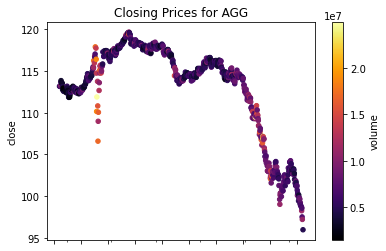

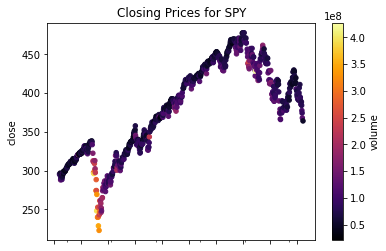

In [34]:
# SUPPLEMENTAL - analysis
# Resetting index of individual ticker dataframes (pre-concatenation) and assigning to variable
agg_3yr_hx_solo=AGG.reset_index()
spy_3yr_hx_solo=SPY.reset_index()
# Limited sample review of new variablized dataframes
display(agg_3yr_hx_solo.head(2))
display(spy_3yr_hx_solo.head(2))

# Visualize performance stocks and bonds over previous 3 years with x, y, c scatter plots
agg_3yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for AGG',
    cmap="inferno",
    )
print('\n')
spy_3yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for SPY',
    cmap='inferno',
    )
print('3 years historical data')

### Comparing the scatter plots above generated by the preceeding three years of data, the stocks and bonds appear to have no significant correlation, with what appears to be a significant downturn in bond performance.



3 yr data


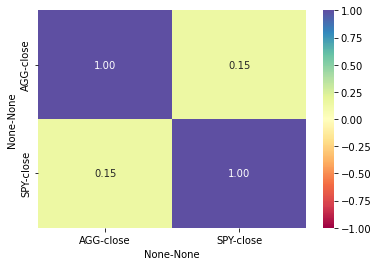

In [35]:
# Isolating 'close' price from re-organized and subsequently concatenated dataframe
adj_price_slice_df = prices_3yr_df.iloc[:,[3,10]]
# Obtaining daily returns using .pct_change() and dropna() functions
adj_price_returns_df = adj_price_slice_df.pct_change().dropna() 
# calculate correlation between returns
adj_price_returns_correlate_df=adj_price_returns_df.corr()
print('\n')
# Create a heatmap from the correlation of returns values
htmap(adj_price_returns_correlate_df, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
print('3 yr data')

### The correlation heatmap between the stocks and bonds approaches zero consistent with what was demonstrated above in the scatter plots visualization.

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [36]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns (i.e. 1:10)
# The weights should be split 40% to bonds (AGG) and 60% to stocks (SPY).
# Run 500 samples.
prices_3yr_30yr_df = prices_3yr_df

MC_four_six_3yr_30yr_weight = MCSimulation(
    portfolio_data = prices_3yr_30yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_four_six_3yr_30yr_weight.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-09-27 04:00:00+00:00  113.00  113.1650  113.00  113.14  4652474   
2019-09-30 04:00:00+00:00  112.93  113.2700  112.92  113.17  6638203   
2019-10-01 04:00:00+00:00  112.71  113.2500  112.63  113.12  5982470   
2019-10-02 04:00:00+00:00  113.19  113.3075  113.09  113.20  9571687   
2019-10-03 04:00:00+00:00  113.34  113.7400  113.32  113.64  5144049   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-27 04:00:00+00:00       15910  113.108829          NaN  297.87   
2019-09-30 04:00:00+00:00       20269  113.172636     0.000265  295.98   
2019-10-01 04:00:00+00:00       30567  113.081002    -0.000442  297.67   
2019-10-02 04:00:00+00:00       23424  113.229809     0.000707  291.49   
2019-10-03 04:00:00+00:00       18028  113.589201     0.003887  287.81   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2019-09-27 04:00:00+00:00  297.9465  293.69  295.40   85194715      454922   
2019-09-30 04:00:00+00:00  297.5500  295.92  296.77   52771311      258680   
2019-10-01 04:00:00+00:00  298.4550  293.00  293.24   90160482      422407   
2019-10-02 04:00:00+00:00  291.5100  286.64  288.06  125924074      608988   
2019-10-03 04:00:00+00:00  290.4500  284.82  290.42   85906608      517842   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-27 04:00:00+00:00  295.623896          NaN  
2019-09-30 04:00:00+00:00  296.786007     0.004638  
2019-10-01 04:00:00+00:00  294.867498    -0.011895  
2019-10-02 04:00:00+00:00  288.821147    -0.017665  
2019-10-03 04:00:00+00:00  288.281946     0.008193

In [37]:
# Run a Monte Carlo simulation to forecast 30 years cumulative returns

MC_four_six_3yr_30yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995923,1.004760,1.002795,1.006964,0.995177,1.000369,0.998198,0.993067,0.997289,1.017465,...,0.989368,1.010470,1.016698,1.001959,0.996017,0.993357,1.006997,1.001245,1.002920,0.993988
2,0.989025,1.002971,1.003871,0.997418,1.019153,0.995381,0.987426,0.997676,0.987811,1.027209,...,0.973930,0.996983,1.013518,1.006211,1.005543,1.004525,1.021081,1.001086,0.987561,0.989933
3,0.997660,0.995377,1.002748,1.006925,1.017622,1.000643,0.989789,0.993395,0.975693,1.046899,...,0.974573,0.997963,1.022809,1.018210,1.017604,1.009657,1.023810,1.016321,0.980793,0.982938
4,0.992818,0.993236,0.999393,1.010563,0.997469,1.013297,0.982675,1.009253,0.984011,1.053932,...,0.997219,0.983248,1.021433,1.021579,1.014902,1.011592,1.016220,1.021796,0.969840,0.981371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.270078,0.899850,0.823255,0.879353,2.814464,2.300639,4.246764,9.178224,1.987699,2.794248,...,1.655216,1.889042,3.999986,7.565176,5.131039,1.156689,2.087642,1.852869,5.180475,6.675209
7557,3.262334,0.891944,0.832133,0.897123,2.828702,2.342100,4.220330,9.187560,1.990546,2.770990,...,1.680287,1.918679,3.953261,7.655386,5.131874,1.163635,2.076900,1.836150,5.131245,6.595235
7558,3.252470,0.892792,0.829361,0.892118,2.808002,2.312500,4.281022,9.063126,1.997888,2.756227,...,1.673759,1.924799,3.917214,7.605125,5.231821,1.157572,2.077685,1.856817,5.116661,6.596774
7559,3.236951,0.887630,0.831020,0.901927,2.850556,2.283236,4.341400,9.123629,2.004490,2.786951,...,1.692338,1.937274,3.972974,7.462626,5.245482,1.145310,2.070880,1.837589,5.162140,6.539516


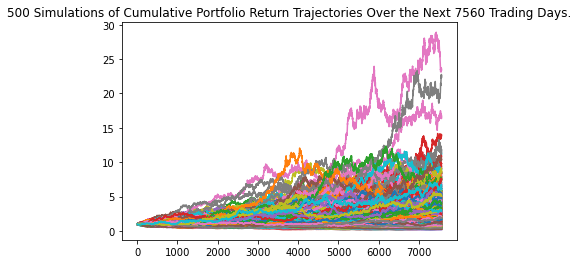

In [38]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
four_six_3yr_30yr_weight_line_plot= MC_four_six_3yr_30yr_weight.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

Monte Carlo 1:10 data to prediction


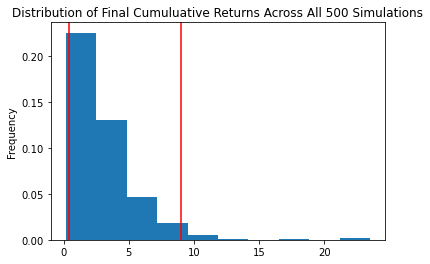

In [39]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
four_six_3yr_30yr_weight_distribution_plot = MC_four_six_3yr_30yr_weight.plot_distribution()
print('Monte Carlo 1:10 data to prediction')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [40]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
four_six_3yr_30yr_weight = MC_four_six_3yr_30yr_weight.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print('\n')
display(print(four_six_3yr_30yr_weight))



count           500.000000
mean              3.028924
std               2.583845
min               0.175704
25%               1.288244
50%               2.400788
75%               3.843331
max              23.517611
95% CI Lower      0.398469
95% CI Upper      9.022600
Name: 7560, dtype: float64


None

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [41]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'\n The current value of the stock and bond portion of the portfolio is ${round(total_stocks_bonds, 2)} \n')


 The current value of the stock and bond portion of the portfolio is $84282.0 



In [74]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# (index positions 8 & 9 from the even_weight_table)
# calculate the range of the possible outcomes for a total_stocks_bonds investment

ci_lower_thirty_cumulative_return = round(four_six_3yr_30yr_weight[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(four_six_3yr_30yr_weight[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f'\n As of {str(end_3yrs)[:10]}, your current stock and bond portfolio value is ${round(total_stocks_bonds, 2)} '
      f'\n There is a 95% chance that an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 30 years will end within in the range of'
      f' ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}. \n')


 As of 2022-09-26, your current stock and bond portfolio value is $84282.0 
 There is a 95% chance that an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 30 years will end within in the range of $33583.76 and $760442.76. 



### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [43]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns (i.e. 3:10)
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
prices_3yr_10yr_df = prices_3yr_df

MC_two_eight_3yr_10yr_weight = MCSimulation(
    portfolio_data = prices_3yr_10yr_df,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_two_eight_3yr_10yr_weight.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-09-27 04:00:00+00:00  113.00  113.1650  113.00  113.14  4652474   
2019-09-30 04:00:00+00:00  112.93  113.2700  112.92  113.17  6638203   
2019-10-01 04:00:00+00:00  112.71  113.2500  112.63  113.12  5982470   
2019-10-02 04:00:00+00:00  113.19  113.3075  113.09  113.20  9571687   
2019-10-03 04:00:00+00:00  113.34  113.7400  113.32  113.64  5144049   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-27 04:00:00+00:00       15910  113.108829          NaN  297.87   
2019-09-30 04:00:00+00:00       20269  113.172636     0.000265  295.98   
2019-10-01 04:00:00+00:00       30567  113.081002    -0.000442  297.67   
2019-10-02 04:00:00+00:00       23424  113.229809     0.000707  291.49   
2019-10-03 04:00:00+00:00       18028  113.589201     0.003887  287.81   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2019-09-27 04:00:00+00:00  297.9465  293.69  295.40   85194715      454922   
2019-09-30 04:00:00+00:00  297.5500  295.92  296.77   52771311      258680   
2019-10-01 04:00:00+00:00  298.4550  293.00  293.24   90160482      422407   
2019-10-02 04:00:00+00:00  291.5100  286.64  288.06  125924074      608988   
2019-10-03 04:00:00+00:00  290.4500  284.82  290.42   85906608      517842   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-27 04:00:00+00:00  295.623896          NaN  
2019-09-30 04:00:00+00:00  296.786007     0.004638  
2019-10-01 04:00:00+00:00  294.867498    -0.011895  
2019-10-02 04:00:00+00:00  288.821147    -0.017665  
2019-10-03 04:00:00+00:00  288.281946     0.008193

In [44]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_two_eight_3yr_10yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998620,0.983721,0.991057,0.993489,1.010161,0.994168,1.006287,0.996058,0.998994,1.004636,...,1.003377,1.019175,1.006968,0.991562,1.013006,1.006192,0.994043,1.018437,0.984746,1.005607
2,1.014473,0.974088,0.990855,0.997364,1.008074,0.972953,0.983910,1.011876,1.002143,1.018281,...,0.992944,1.029529,1.017151,0.990579,1.025986,0.997114,0.995299,0.996590,0.969928,1.006724
3,1.020043,0.975470,0.994163,0.999129,1.012642,0.968862,0.981698,1.018768,1.023503,1.035635,...,1.001622,1.039225,1.029828,0.979710,1.029409,1.008922,0.994519,0.983617,0.960289,1.013912
4,1.016524,0.960165,1.008949,1.007189,1.039767,0.951368,0.988146,1.027338,1.028396,1.033501,...,1.010261,1.052756,1.039937,0.987434,1.018597,1.015658,1.002330,0.993765,0.970441,1.012209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.258691,0.523952,1.207745,0.832180,1.915560,1.359469,1.592934,2.294033,6.171317,2.059748,...,0.514510,3.546711,0.789347,0.554881,3.079230,5.094239,1.673431,0.925701,3.107803,0.675315
2517,1.245879,0.524320,1.208185,0.808871,1.930366,1.344632,1.613997,2.258714,6.193513,2.090257,...,0.504133,3.563151,0.783035,0.553245,3.074127,5.143568,1.671647,0.926189,3.085039,0.660267
2518,1.198064,0.518065,1.202450,0.804063,1.934251,1.323374,1.570968,2.244980,6.397235,2.059363,...,0.501613,3.555497,0.791095,0.543001,3.075026,5.122563,1.676765,0.910774,3.081693,0.665095
2519,1.208924,0.528687,1.224825,0.794646,1.958276,1.309666,1.558190,2.241215,6.355619,2.071769,...,0.499016,3.595321,0.779132,0.544545,3.136730,5.137296,1.676912,0.902145,3.111620,0.668018


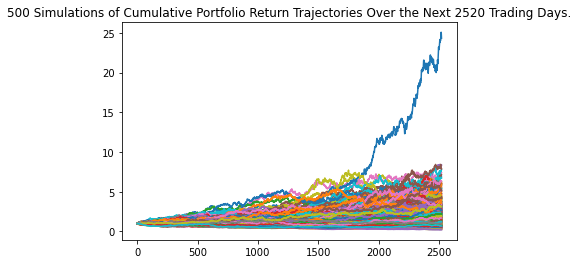

In [45]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

two_eight_3yr_10yr_weight_line_plot= MC_two_eight_3yr_10yr_weight.plot_simulation()

Monte Carlo 3:10 data to prediction


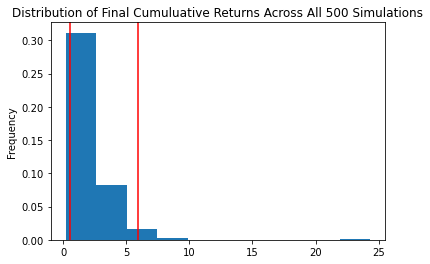

In [46]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
 
two_eight_3yr_10yr_weight_distribution_plot = MC_two_eight_3yr_10yr_weight.plot_distribution()
print('Monte Carlo 3:10 data to prediction')

In [47]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

two_eight_3yr_10yr_weight = MC_two_eight_3yr_10yr_weight.summarize_cumulative_return()
# Review the 10-year Monte Carlo summary statistics

print('\n')
display(print(two_eight_3yr_10yr_weight))



count           500.000000
mean              2.083520
std               1.679328
min               0.194929
25%               1.104503
50%               1.746411
75%               2.589376
max              24.330179
95% CI Lower      0.501845
95% CI Upper      5.934374
Name: 2520, dtype: float64


None

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [48]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'\n The current value of the stock and bond portion of the portfolio is ${round(total_stocks_bonds, 2)} \n')


 The current value of the stock and bond portion of the portfolio is $84282.0 



In [75]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(two_eight_3yr_10yr_weight[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(two_eight_3yr_10yr_weight[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f'\n As of {str(end_3yrs)[:10]}, your current stock and bond portfolio value is ${round(total_stocks_bonds, 2)} '
      f'\n There is a 95% chance that an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 20-80 weight portfolio over the next 10 years will end within in the range of'
      f' ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}. \n')


 As of 2022-09-26, your current stock and bond portfolio value is $84282.0 
 There is a 95% chance that an initial investment of $84282.0 in the portfolio
 with a 20-80 weight portfolio over the next 10 years will end within in the range of $42296.53 and $500160.94. 



#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

# SUPPLEMENTAL ANALYSIS

## As the Monte Carlo Simulation is designed around limits of 5 to 1, history to prediction parameters, author has proceded with additional analysis with more realistic parameters.  That is, using three years of data to predict ten or thirty years of returns would not be viewe as reasonable.

In [50]:
# Analysis using 3 years data for a 1yr prediction
# Configure the Monte Carlo simulation to forecast 1 years cumulative returns (3:1)
# traditional portfolio split: 40% bonds (AGG) and 60% stocks (SPY) 
# Run 500 samples.
prices_3yr_1yr_df = prices_3yr_df

MC_four_six_3yr_1yr_weight = MCSimulation(
    portfolio_data = prices_3yr_1yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*1
)

# Review the sMC_four_six_1yr_weightimulation input data
MC_four_six_3yr_1yr_weight.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2019-09-27 04:00:00+00:00  113.00  113.1650  113.00  113.14  4652474   
2019-09-30 04:00:00+00:00  112.93  113.2700  112.92  113.17  6638203   
2019-10-01 04:00:00+00:00  112.71  113.2500  112.63  113.12  5982470   
2019-10-02 04:00:00+00:00  113.19  113.3075  113.09  113.20  9571687   
2019-10-03 04:00:00+00:00  113.34  113.7400  113.32  113.64  5144049   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-27 04:00:00+00:00       15910  113.108829          NaN  297.87   
2019-09-30 04:00:00+00:00       20269  113.172636     0.000265  295.98   
2019-10-01 04:00:00+00:00       30567  113.081002    -0.000442  297.67   
2019-10-02 04:00:00+00:00       23424  113.229809     0.000707  291.49   
2019-10-03 04:00:00+00:00       18028  113.589201     0.003887  287.81   

                                                                            \
                               high     low   close     volume trade_count   
timestamp                                                                    
2019-09-27 04:00:00+00:00  297.9465  293.69  295.40   85194715      454922   
2019-09-30 04:00:00+00:00  297.5500  295.92  296.77   52771311      258680   
2019-10-01 04:00:00+00:00  298.4550  293.00  293.24   90160482      422407   
2019-10-02 04:00:00+00:00  291.5100  286.64  288.06  125924074      608988   
2019-10-03 04:00:00+00:00  290.4500  284.82  290.42   85906608      517842   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-27 04:00:00+00:00  295.623896          NaN  
2019-09-30 04:00:00+00:00  296.786007     0.004638  
2019-10-01 04:00:00+00:00  294.867498    -0.011895  
2019-10-02 04:00:00+00:00  288.821147    -0.017665  
2019-10-03 04:00:00+00:00  288.281946     0.008193

In [51]:
# Run the Monte Carlo simulation to forecast 1 years cumulative returns

MC_four_six_3yr_1yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989337,1.020899,0.996183,0.998592,0.999319,1.002785,0.996885,1.012481,1.000386,0.993792,...,0.975212,1.005319,0.986484,0.994512,0.997424,1.006753,1.010037,0.996741,0.998069,1.012390
2,0.971529,1.008216,1.004170,1.004352,0.998365,0.983147,1.003293,1.017778,0.991579,0.993878,...,0.975397,1.015690,0.975929,0.989103,1.002123,1.012791,0.997673,0.998853,1.002591,1.008760
3,0.970188,1.018297,0.993488,0.996841,0.997447,0.988184,0.992127,1.011224,0.993221,0.994543,...,0.983004,1.020125,0.981197,0.994317,1.014487,1.010537,0.994647,1.000807,1.002785,1.004419
4,0.962967,1.019793,1.001414,0.982445,1.003454,0.991330,0.969039,1.019152,0.980766,0.985247,...,0.982251,1.026917,0.984228,0.978426,1.019823,1.009422,1.006772,0.998265,1.007192,0.998313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.105639,1.189878,1.159337,0.931672,1.230218,0.903735,0.877426,1.159219,1.050036,1.121839,...,0.789970,0.951253,1.063190,1.389023,1.049723,1.038910,0.863067,0.999777,0.912674,1.060511
249,1.103884,1.172092,1.150129,0.929843,1.239350,0.889953,0.876837,1.148895,1.040837,1.124064,...,0.786475,0.950043,1.079538,1.375985,1.037090,1.038263,0.856407,0.995473,0.922975,1.054736
250,1.102812,1.171208,1.146442,0.936363,1.264779,0.889403,0.867272,1.149897,1.039902,1.110926,...,0.793722,0.953896,1.087608,1.398324,1.056450,1.024955,0.859393,0.999507,0.917994,1.057983
251,1.103330,1.165513,1.139070,0.927956,1.258703,0.892095,0.871040,1.139213,1.034178,1.102514,...,0.799091,0.947517,1.084913,1.387212,1.063801,1.034777,0.856112,0.997040,0.926629,1.055256


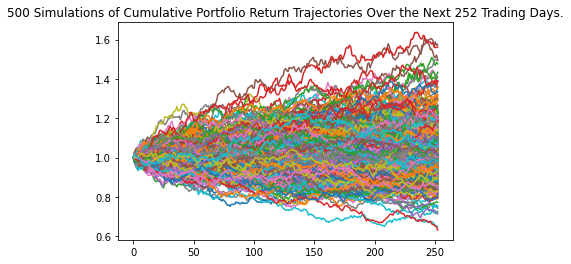

In [52]:
# Visualize the 1-year (3:1) Monte Carlo simulation by creating an
# overlay line plot
four_six_3yr_1yr_weight_line_plot= MC_four_six_3yr_1yr_weight.plot_simulation()

Monte Carlo 3:1 data to prediction


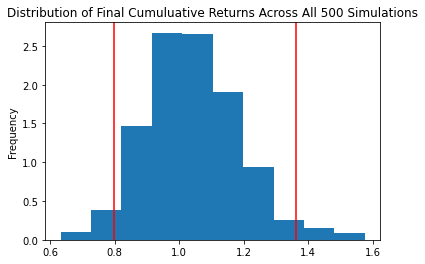

In [53]:
# Visualize the probability distribution of the 1-year (3:1) Monte Carlo simulation 
four_six_3yr_1yr_weight_distribution_plot = MC_four_six_3yr_1yr_weight.plot_distribution()
print('Monte Carlo 3:1 data to prediction')

In [54]:
# Generate summary statistics from the 1-year Monte Carlo simulation results
# Save the results as a variable
four_six_3yr_1yr_weight = MC_four_six_3yr_1yr_weight.summarize_cumulative_return()

# Review the 1-year (3:1) Monte Carlo summary statistics
print('\n')
display(print(four_six_3yr_1yr_weight))



count           500.000000
mean              1.040980
std               0.143618
min               0.631616
25%               0.943152
50%               1.027848
75%               1.129399
max               1.575198
95% CI Lower      0.798592
95% CI Upper      1.360635
Name: 252, dtype: float64


None

In [76]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_one_cumulative_return = round(four_six_3yr_1yr_weight[8]*total_stocks_bonds,2)
ci_upper_one_cumulative_return = round(four_six_3yr_1yr_weight[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f'\n As of {str(end_3yrs)[:10]}, your current stock and bond portfolio value is ${round(total_stocks_bonds, 2)} '
      f'\n There is a 95% chance that an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 1 year will end within in the range of'
      f' ${ci_lower_one_cumulative_return} and ${ci_upper_one_cumulative_return}. \n')


 As of 2022-09-26, your current stock and bond portfolio value is $84282.0 
 There is a 95% chance that an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 1 year will end within in the range of $67306.89 and $114677.0. 



In [56]:
# SCENARIO TWO - 5 years history
# Set start and end dates of 5 years back from your current date
end_5yrs = pd.to_datetime('today')
start_5yrs = end_5yrs - np.timedelta64(5, 'Y')
display(end_5yrs)
display(start_5yrs)

# Set the values for start_date and end_date using the pd.Timestamp function
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_5yrs = tstamp(start_5yrs, tz = 'America/New_York').isoformat()
end_5yrs = tstamp(end_5yrs, tz = 'America/New_York').isoformat()
display(end_5yrs)
display(start_5yrs)
print('\n')

# Use the Alpaca get_bars function to make the API call to get the 5 years worth of pricing data
# set limit
limit_rows = 10000

api_call_5yrs_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_5yrs,
    end = end_5yrs,
    limit = limit_rows
).df

# Review the first 5 rows of the Alpaca DataFrame
display(api_call_5yrs_df.head())
print('\n')
display(api_call_5yrs_df.tail())

# Reorganize the DataFrame
# Separate ticker data
AGG = api_call_5yrs_df[api_call_5yrs_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = api_call_5yrs_df[api_call_5yrs_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_5yr_df = ccat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(prices_5yr_df.head())
print('\n')
display(prices_5yr_df.tail())

Timestamp('2022-09-26 13:04:20.698601')

Timestamp('2017-09-26 07:58:20.698601')

'2022-09-26T13:04:20.698601-04:00'

'2017-09-26T07:58:20.698601-04:00'

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-09-27 04:00:00+00:00,109.65,109.75,109.60,109.67,3042751,7265,109.673616,AGG
2017-09-28 04:00:00+00:00,109.58,109.72,109.51,109.68,1702507,8599,109.627979,AGG
2017-09-29 04:00:00+00:00,109.74,109.77,109.54,109.59,5770818,15131,109.631296,AGG
2017-10-02 04:00:00+00:00,109.43,109.51,109.33,109.43,5692248,17043,109.424156,AGG
2017-10-03 04:00:00+00:00,109.46,109.54,109.40,109.52,2462485,12428,109.492033,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-20 04:00:00+00:00,385.10,386.12,381.1950,384.0900,76685764,555454,384.152364,SPY
2022-09-21 04:00:00+00:00,386.06,389.31,377.3800,377.4500,104302139,807310,383.197346,SPY
2022-09-22 04:00:00+00:00,376.50,378.30,373.4400,374.2200,88922900,630401,375.330794,SPY
2022-09-23 04:00:00+00:00,370.58,370.62,363.2900,367.9500,121574096,838774,367.579806,SPY
2022-09-26 04:00:00+00:00,366.41,370.21,363.0299,364.5812,49581055,410262,366.555761,SPY


AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-27 04:00:00+00:00  109.65  109.75  109.60  109.67  3042751   
2017-09-28 04:00:00+00:00  109.58  109.72  109.51  109.68  1702507   
2017-09-29 04:00:00+00:00  109.74  109.77  109.54  109.59  5770818   
2017-10-02 04:00:00+00:00  109.43  109.51  109.33  109.43  5692248   
2017-10-03 04:00:00+00:00  109.46  109.54  109.40  109.52  2462485   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-09-27 04:00:00+00:00        7265  109.673616  249.89  250.49  248.8700   
2017-09-28 04:00:00+00:00        8599  109.627979  249.73  250.44  249.6300   
2017-09-29 04:00:00+00:00       15131  109.631296  250.37  251.32  250.1300   
2017-10-02 04:00:00+00:00       17043  109.424156  251.50  252.32  251.2926   
2017-10-03 04:00:00+00:00       12428  109.492033  252.48  252.89  252.2300   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-27 04:00:00+00:00  250.05  79756426      215754  249.839037  
2017-09-28 04:00:00+00:00  250.35  44778841      125235  250.151553  
2017-09-29 04:00:00+00:00  251.23  85578002      174801  250.956606  
2017-10-02 04:00:00+00:00  252.32  59020425      173638  251.973512  
2017-10-03 04:00:00+00:00  252.86  66650169      147208  252.585149

AGG                                     \
                            open     high      low  close    volume   
timestamp                                                             
2022-09-20 04:00:00+00:00  98.20  98.4000  98.0800  98.24  11210119   
2022-09-21 04:00:00+00:00  98.40  98.6001  97.8600  98.55   6674502   
2022-09-22 04:00:00+00:00  97.90  97.9200  97.4039  97.50   7092118   
2022-09-23 04:00:00+00:00  97.40  97.4500  96.8900  97.20  11053650   
2022-09-26 04:00:00+00:00  96.87  96.9100  95.9400  95.95   4622222   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2022-09-20 04:00:00+00:00       22324  98.237305  385.10  386.12  381.1950   
2022-09-21 04:00:00+00:00       32613  98.321112  386.06  389.31  377.3800   
2022-09-22 04:00:00+00:00       25072  97.595666  376.50  378.30  373.4400   
2022-09-23 04:00:00+00:00       41351  97.135798  370.58  370.62  363.2900   
2022-09-26 04:00:00+00:00       18772  96.511212  366.41  370.21  363.0299   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2022-09-20 04:00:00+00:00  384.0900   76685764      555454  384.152364  
2022-09-21 04:00:00+00:00  377.4500  104302139      807310  383.197346  
2022-09-22 04:00:00+00:00  374.2200   88922900      630401  375.330794  
2022-09-23 04:00:00+00:00  367.9500  121574096      838774  367.579806  
2022-09-26 04:00:00+00:00  364.5812   49581055      410262  366.555761

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2017-09-27 04:00:00+00:00,109.65,109.75,109.60,109.67,3042751,7265,109.673616
1,2017-09-28 04:00:00+00:00,109.58,109.72,109.51,109.68,1702507,8599,109.627979


,timestamp,open,high,low,close,volume,trade_count,vwap
0,2017-09-27 04:00:00+00:00,249.89,250.49,248.87,250.05,79756426,215754,249.839037
1,2017-09-28 04:00:00+00:00,249.73,250.44,249.63,250.35,44778841,125235,250.151553


<AxesSubplot:title={'center':'Closing Prices for SPY'}, xlabel='timestamp', ylabel='close'>

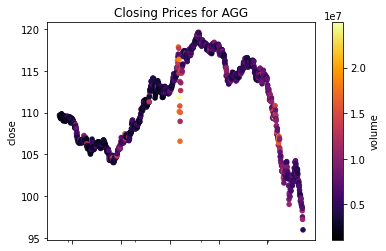

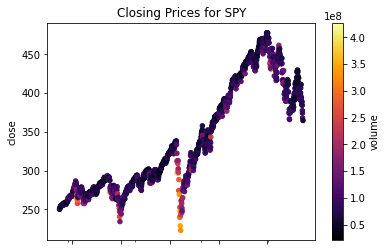

In [57]:
# SCENARIO TWO - 5 years history
# Resetting index of individual ticker dataframes (pre-concatenation) and assigning to variable
agg_5yr_hx_solo=AGG.reset_index()
spy_5yr_hx_solo=SPY.reset_index()
# Limited sample review of new variablized dataframes
display(agg_5yr_hx_solo.head(2))
display(spy_5yr_hx_solo.head(2))

# Visualize performance stocks and bonds over previous 3 years with x, y, c scatter plots
agg_5yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for AGG',
    cmap="inferno",
    )
print('\n')
spy_5yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for SPY',
    cmap='inferno',
    )



5 yr data


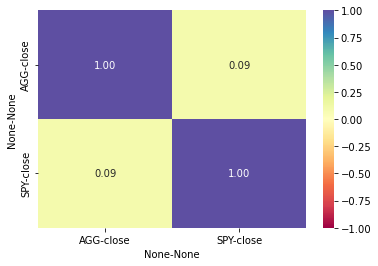

In [58]:
# Isolating 'close' price from re-organized and subsequently concatenated dataframe
adj_price_slice_df = prices_5yr_df.iloc[:,[3,10]]
# Obtaining daily returns using .pct_change() and dropna() functions
adj_price_returns_df = adj_price_slice_df.pct_change().dropna() 
# calculate correlation between returns
adj_price_returns_correlate_df=adj_price_returns_df.corr()
print('\n')
# Create a heatmap from the correlation of returns values
htmap(adj_price_returns_correlate_df, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
print('5 yr data')

In [59]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns with 5 yrs data history (i.e. 1:1)
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
prices_5yr_5yr_df= prices_5yr_df

MC_four_six_5yr_5yr_weight = MCSimulation(
    portfolio_data = prices_5yr_5yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Review the simulation input data
MC_four_six_5yr_5yr_weight.portfolio_data.head()

# Run a Monte Carlo simulation to forecast five years cumulative returns

MC_four_six_5yr_5yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002615,1.008373,1.010397,1.002337,0.998769,0.994732,0.993417,1.000008,0.994868,1.005398,...,0.997304,1.008795,1.009319,0.995513,0.996124,0.991200,0.998678,0.991391,0.990650,1.000888
2,1.004695,1.009338,1.017141,0.996240,0.982116,0.991562,0.988443,1.019015,0.987918,1.009371,...,0.993733,1.016529,1.012386,0.997494,0.999875,0.976314,1.000389,0.998444,0.991022,1.014303
3,0.988504,0.994636,1.021645,1.008570,0.990410,0.998552,0.994899,1.038372,0.991360,1.021996,...,0.992871,1.019926,1.000699,1.000188,1.003898,0.981698,1.007899,1.000581,0.992294,1.010641
4,0.994287,1.003540,1.022395,1.014859,0.996966,1.012241,0.996791,1.046380,0.986894,1.030982,...,0.998769,1.025586,0.991540,0.998608,1.003827,0.988074,0.993560,0.985852,1.001500,1.022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.372562,1.409832,2.176034,1.006938,1.214671,0.740018,1.495538,1.612911,1.393869,2.103049,...,0.945068,1.297439,1.071014,1.202737,0.925401,1.210043,1.799102,0.947533,0.736500,1.548588
1257,1.374711,1.411342,2.174653,1.019946,1.220858,0.746062,1.500014,1.606825,1.405510,2.116220,...,0.949679,1.298764,1.061955,1.196652,0.905825,1.210023,1.789091,0.952278,0.731594,1.554812
1258,1.380956,1.385117,2.141433,1.009368,1.217595,0.740395,1.494432,1.640356,1.397286,2.139609,...,0.951797,1.291329,1.060287,1.185925,0.902730,1.206566,1.779305,0.958981,0.729497,1.552532
1259,1.369215,1.395283,2.139152,1.019577,1.220314,0.744386,1.502652,1.654709,1.388055,2.122249,...,0.948900,1.270819,1.051874,1.191821,0.902805,1.202669,1.786784,0.958170,0.727159,1.563404


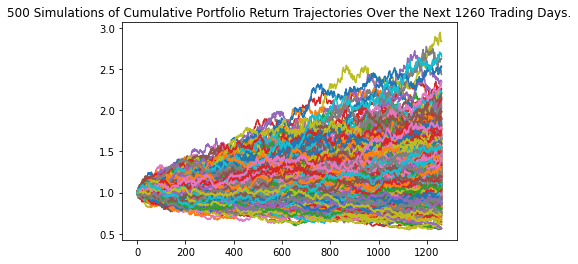

In [60]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
four_six_5yr_5yr_weight_line_plot= MC_four_six_5yr_5yr_weight.plot_simulation()

Monte Carlo 1:1 data to prediction


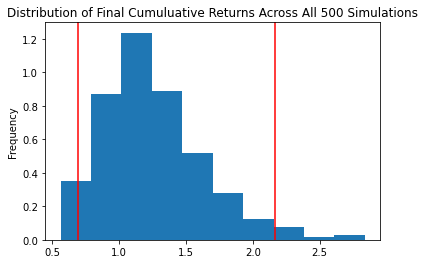

In [61]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
four_six_5yr_5yr_weight_distribution_plot = MC_four_six_5yr_5yr_weight.plot_distribution()
print('Monte Carlo 1:1 data to prediction')

In [62]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
four_six_5yr_5yr_weight = MC_four_six_5yr_5yr_weight.summarize_cumulative_return()

# Review the 5-year Monte Carlo summary statistics
print('\n')
display(print(four_six_5yr_5yr_weight))



count           500.000000
mean              1.250248
std               0.383176
min               0.560334
25%               0.980826
50%               1.198942
75%               1.453220
max               2.839376
95% CI Lower      0.694485
95% CI Upper      2.165861
Name: 1260, dtype: float64


None

In [77]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# (index positions 8 & 9 from the even_weight_table)
# calculate the range of the possible outcomes for a total_stocks_bonds investment

ci_lower_five_cumulative_return = round(four_six_5yr_5yr_weight[8]*total_stocks_bonds,2)
ci_upper_five_cumulative_return = round(four_six_5yr_5yr_weight[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f'\n As of {str(end_5yrs)[:10]}, your current stock and bond portfolio value is ${round(total_stocks_bonds, 2)} '
      f'\n There is a 95% chance that an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 5 years will end within in the range of'
      f' ${ci_lower_five_cumulative_return} and ${ci_upper_five_cumulative_return}. \n')


 As of 2022-09-26, your current stock and bond portfolio value is $84282.0 
 There is a 95% chance that an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 5 years will end within in the range of $58532.55 and $182543.14. 



In [64]:
# SUPPLEMENTAL
# SCENARIO THREE - 7 years history
# Set start and end dates of 7 years back from your current date
end_7yrs = pd.to_datetime('today')
start_7yrs = end_7yrs - np.timedelta64(7, 'Y')
display(end_7yrs)
display(start_7yrs)

# Set the values for start_date and end_date using the pd.Timestamp function
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_7yrs = tstamp(start_7yrs, tz = 'America/New_York').isoformat()
end_7yrs = tstamp(end_7yrs, tz = 'America/New_York').isoformat()
display(end_7yrs)
display(start_7yrs)
print('\n')

# Use the Alpaca get_bars function to make the API call to get the 7 years worth of pricing data
# set limit
limit_rows = 10000

api_call_7yrs_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_7yrs,
    end = end_7yrs,
    limit = limit_rows
).df

# Review the first 5 rows of the Alpaca DataFrame
display(api_call_7yrs_df.head())
print('\n')
display(api_call_7yrs_df.tail())

# Reorganize the DataFrame
# Separate ticker data
AGG = api_call_7yrs_df[api_call_7yrs_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = api_call_7yrs_df[api_call_7yrs_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_7yr_df = ccat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(prices_7yr_df.head())
print('\n')
display(prices_7yr_df.tail())

Timestamp('2022-09-26 13:04:35.441126')

Timestamp('2015-09-26 20:20:11.441126')

'2022-09-26T13:04:35.441126-04:00'

'2015-09-26T20:20:11.441126-04:00'

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,108.54,108.8400,108.43,108.82,4259986,15562,108.754152,AGG
2015-12-02 05:00:00+00:00,108.73,108.7799,108.61,108.67,2462787,11581,108.684692,AGG
2015-12-03 05:00:00+00:00,108.41,108.4100,107.81,107.89,4634020,16801,108.040315,AGG
2015-12-04 05:00:00+00:00,108.05,108.3000,108.00,108.24,2182057,9796,108.192232,AGG
2015-12-07 05:00:00+00:00,108.30,108.5800,108.23,108.40,2143773,9104,108.460067,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-20 04:00:00+00:00,385.10,386.12,381.1950,384.0900,76685764,555454,384.152364,SPY
2022-09-21 04:00:00+00:00,386.06,389.31,377.3800,377.4500,104302139,807310,383.197346,SPY
2022-09-22 04:00:00+00:00,376.50,378.30,373.4400,374.2200,88922900,630401,375.330794,SPY
2022-09-23 04:00:00+00:00,370.58,370.62,363.2900,367.9500,121574096,838774,367.579806,SPY
2022-09-26 04:00:00+00:00,366.41,370.21,363.0299,364.5812,49581055,410262,366.555761,SPY


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.40  2143773   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       15562  108.754152  209.42  210.8200  209.1100   
2015-12-02 05:00:00+00:00       11581  108.684692  210.60  211.0000  208.2300   
2015-12-03 05:00:00+00:00       16801  108.040315  208.90  209.1500  204.7511   
2015-12-04 05:00:00+00:00        9796  108.192232  206.10  209.9700  205.9300   
2015-12-07 05:00:00+00:00        9104  108.460067  209.20  209.7295  207.2000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2015-12-01 05:00:00+00:00  210.68   97858418      337780  209.921410  
2015-12-02 05:00:00+00:00  208.54  108069059      367013  209.563055  
2015-12-03 05:00:00+00:00  205.58  166224154      546768  206.878936  
2015-12-04 05:00:00+00:00  209.66  192878747      556731  208.178631  
2015-12-07 05:00:00+00:00  208.27  102027111      374705  208.276128

AGG                                     \
                            open     high      low  close    volume   
timestamp                                                             
2022-09-20 04:00:00+00:00  98.20  98.4000  98.0800  98.24  11210119   
2022-09-21 04:00:00+00:00  98.40  98.6001  97.8600  98.55   6674502   
2022-09-22 04:00:00+00:00  97.90  97.9200  97.4039  97.50   7092118   
2022-09-23 04:00:00+00:00  97.40  97.4500  96.8900  97.20  11053650   
2022-09-26 04:00:00+00:00  96.87  96.9100  95.9400  95.95   4622222   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2022-09-20 04:00:00+00:00       22324  98.237305  385.10  386.12  381.1950   
2022-09-21 04:00:00+00:00       32613  98.321112  386.06  389.31  377.3800   
2022-09-22 04:00:00+00:00       25072  97.595666  376.50  378.30  373.4400   
2022-09-23 04:00:00+00:00       41351  97.135798  370.58  370.62  363.2900   
2022-09-26 04:00:00+00:00       18772  96.511212  366.41  370.21  363.0299   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2022-09-20 04:00:00+00:00  384.0900   76685764      555454  384.152364  
2022-09-21 04:00:00+00:00  377.4500  104302139      807310  383.197346  
2022-09-22 04:00:00+00:00  374.2200   88922900      630401  375.330794  
2022-09-23 04:00:00+00:00  367.9500  121574096      838774  367.579806  
2022-09-26 04:00:00+00:00  364.5812   49581055      410262  366.555761

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2015-12-01 05:00:00+00:00,108.54,108.8400,108.43,108.82,4259986,15562,108.754152
1,2015-12-02 05:00:00+00:00,108.73,108.7799,108.61,108.67,2462787,11581,108.684692


,timestamp,open,high,low,close,volume,trade_count,vwap
0,2015-12-01 05:00:00+00:00,209.42,210.82,209.11,210.68,97858418,337780,209.921410
1,2015-12-02 05:00:00+00:00,210.60,211.00,208.23,208.54,108069059,367013,209.563055


<AxesSubplot:title={'center':'Closing Prices for SPY'}, xlabel='timestamp', ylabel='close'>

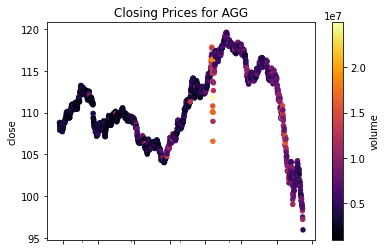

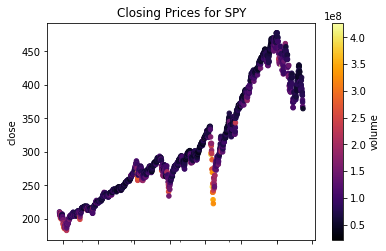

In [65]:
# SCENARIO THREE - 7 years history
# Resetting index of individual ticker dataframes (pre-concatenation) and assigning to variable
agg_7yr_hx_solo=AGG.reset_index()
spy_7yr_hx_solo=SPY.reset_index()
# Limited sample review of new variablized dataframes
display(agg_7yr_hx_solo.head(2))
display(spy_7yr_hx_solo.head(2))

# Visualize performance stocks and bonds over previous 3 years with x, y, c scatter plots
agg_7yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for AGG',
    cmap="inferno",
    )
print('\n')
spy_7yr_hx_solo.plot.scatter(
    x='timestamp',
    y='close',
    c='volume',
    title=f'Closing Prices for SPY',
    cmap='inferno',
    )



7 yr data


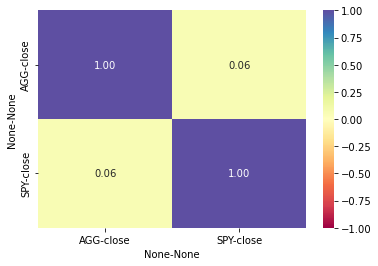

In [66]:
# Isolating 'close' price from re-organized and subsequently concatenated dataframe
adj_price_slice_df = prices_7yr_df.iloc[:,[3,10]]
# Obtaining daily returns using .pct_change() and dropna() functions
adj_price_returns_df = adj_price_slice_df.pct_change().dropna() 
# calculate correlation between returns
adj_price_returns_correlate_df=adj_price_returns_df.corr()
print('\n')
# Create a heatmap from the correlation of returns values
htmap(adj_price_returns_correlate_df, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
print('7 yr data')

In [67]:
# Configure the Monte Carlo simulation to forecast 1 years cumulative returns with 7 years data history (i.e. 7:1)
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
prices_7yr_1yr_df  = prices_7yr_df 

MC_four_six_7yr_1yr_weight = MCSimulation(
    portfolio_data = prices_7yr_1yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*1
)

# Review the simulation input data
MC_four_six_7yr_1yr_weight.portfolio_data.head()

# Run a Monte Carlo simulation to forecast five years cumulative returns

MC_four_six_7yr_1yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992549,1.007250,1.002376,1.003427,0.997755,1.011121,1.006169,1.009041,0.997312,1.000930,...,0.994244,0.983467,0.991002,1.002409,1.000419,1.019242,0.992498,1.000524,0.989466,1.006107
2,0.993639,1.004167,1.005287,1.003100,0.993370,1.009049,1.024113,1.013062,1.001746,0.998969,...,0.996293,0.979413,0.987216,0.994295,1.004315,1.022653,0.997130,0.995254,0.984860,1.005169
3,0.992935,1.009186,1.016154,1.010382,0.982740,1.008968,1.016553,1.017544,0.997953,1.005975,...,0.999213,0.980450,1.006694,0.991471,1.007983,1.034683,1.003680,0.994882,0.987656,1.001145
4,0.990378,1.004769,1.012367,1.000890,0.987956,1.000289,1.012998,1.024010,0.998576,1.001371,...,0.999825,0.979127,1.005320,0.995395,1.007639,1.040919,0.998000,0.998380,0.984303,0.986689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.050711,1.132674,1.025758,0.844910,0.985677,0.963014,1.092543,1.125761,1.243251,1.261678,...,1.072811,0.946445,1.040612,1.087141,1.158465,1.077544,1.130172,1.160535,1.102836,0.937948
249,1.052837,1.139071,1.025164,0.853956,1.002604,0.958886,1.101603,1.119585,1.239584,1.271924,...,1.072154,0.954510,1.046225,1.091827,1.157529,1.077110,1.127943,1.164836,1.105417,0.928669
250,1.046744,1.139568,1.024456,0.845988,0.992144,0.958256,1.100511,1.113056,1.227875,1.277645,...,1.079190,0.939623,1.056191,1.081775,1.170613,1.082560,1.120516,1.167847,1.113684,0.938857
251,1.056368,1.136246,1.026252,0.842231,0.989952,0.949859,1.107746,1.124820,1.226498,1.292636,...,1.069601,0.932481,1.051900,1.084261,1.182182,1.074225,1.128321,1.166325,1.125624,0.952116


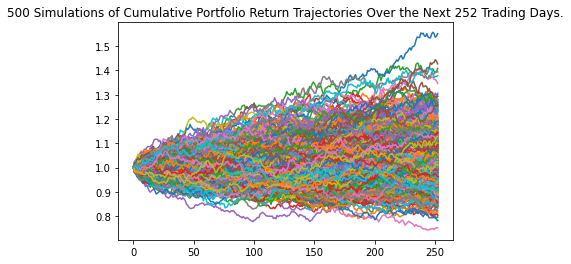

In [68]:
# Visualize the 1-year Monte Carlo simulation by creating an
# overlay line plot

four_six_7yr_1yr_weight_line_plot= MC_four_six_7yr_1yr_weight.plot_simulation()

Monte Carlo 7:1 data to prediction


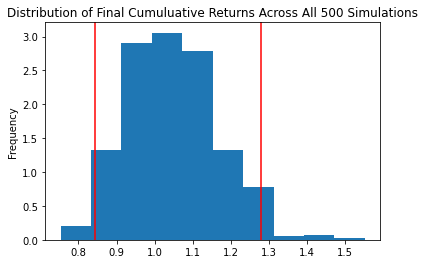

In [69]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 

four_six_7yr_1yr_weight_distribution_plot = MC_four_six_7yr_1yr_weight.plot_distribution()
print('Monte Carlo 7:1 data to prediction')

In [70]:
# Generate summary statistics from the 1-year Monte Carlo simulation results
# Save the results as a variable
four_six_7yr_1yr_weight = MC_four_six_7yr_1yr_weight.summarize_cumulative_return()

# Review the 1-year Monte Carlo summary statistics
print('\n')
display(print(four_six_7yr_1yr_weight))



count           500.000000
mean              1.046546
std               0.117219
min               0.752990
25%               0.962984
50%               1.041300
75%               1.122951
max               1.551301
95% CI Lower      0.844503
95% CI Upper      1.277902
Name: 252, dtype: float64


None

In [78]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# (index positions 8 & 9 from the even_weight_table)
# calculate the range of the possible outcomes for a total_stocks_bonds investment

ci_lower_one_cumulative_return = round(four_six_7yr_1yr_weight[8]*total_stocks_bonds,2)
ci_upper_one_cumulative_return = round(four_six_7yr_1yr_weight[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f'\n As of {str(end_7yrs)[:10]}, your current stock and bond portfolio value is ${round(total_stocks_bonds, 2)} '
      f'\n There is a 95% chance that an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 1 years will end within in the range of'
      f' ${ci_lower_five_cumulative_return} and ${ci_upper_five_cumulative_return}. \n')


 As of 2022-09-26, your current stock and bond portfolio value is $84282.0 
 There is a 95% chance that an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 1 years will end within in the range of $58532.55 and $182543.14. 



In [72]:
# Using 3 years of historical data# Print the result of your calculations
print(f'\n 3 years historical data'
      f'\n an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 30 years will end within in the range of'
      f' ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}. \n')

print(f'\n an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 20-80 weight portfolio over the next 10 years will end within in the range of'
      f' ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}. \n')

print(f'\n an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 1 year will end within in the range of'
      f' ${ci_lower_one_cumulative_return} and ${ci_upper_one_cumulative_return}. \n')

# Using 7 years of historical data# Print the result of your calculations
print(f'\n 7 years historical data'
      f'\n an initial investment of ${round(total_stocks_bonds, 2)} in the portfolio'
      f'\n with a 40-60 weight portfolio over the next 1 years will end within in the range of'
      f' ${ci_lower_five_cumulative_return} and ${ci_upper_five_cumulative_return}. \n')


 3 years historical data
 an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 30 years will end within in the range of $33583.76 and $760442.76. 


 an initial investment of $84282.0 in the portfolio
 with a 20-80 weight portfolio over the next 10 years will end within in the range of $42296.53 and $500160.94. 


 an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 1 year will end within in the range of $71176.4 and $107704.12. 


 7 years historical data
 an initial investment of $84282.0 in the portfolio
 with a 40-60 weight portfolio over the next 1 years will end within in the range of $58532.55 and $182543.14. 



## Summary Supplemental Analysis

Historic data analysis
1. Comparative visualized data analysis (heatmap) between the Bond portfolio and Stock portfolio shows correlation approaches zero.
2. Comparative visualized data analysis (scatter plot- x, y, c) between the Bond portfolio and Stock portfolio shows the bond portfolio's performance has been exceedingly poor and adjustment of the portfolio would be advised.

Monte Carlo Simulation
1. Limited historic data adversely impacts reliability of simulation projections/predictions
2. Excessive projections/predictions adversely impacts reliability of projects/predictions

review of sample data below provides a general comparison ranging from 
minimal historical data with large/long range predictions as far as 30 years
vs
increasing historical data and shorter range predictions as much as 1 year.
![example_mc_performance](Images/example_mc_performance.png)